In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import os
from astropy.wcs import WCS
import scipy.integrate as integrate

In [2]:
path=os.getcwd()+'/bias'
fitsfile=fits.open(path+'/'+'16-23-54_Ha_Bias_0.00s_0000.fits')
datax = fitsfile[0].data

In [3]:
def bias():
    path=os.getcwd()+'/bias'
    Num_of_files=len(os.listdir(path))
    Grid=np.zeros(datax.shape)
    for file in os.listdir(path):
        fitsfile=fits.open(path+'/'+file)
        dati = fitsfile[0].data
        Grid+=dati
    Grid/=Num_of_files
    return Grid

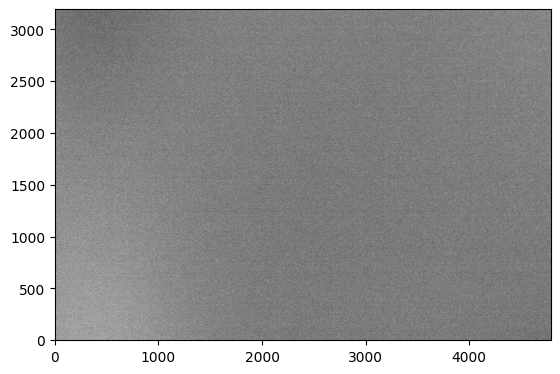

In [4]:
masterbias=bias()
mean=np.mean(masterbias)
std=np.std(masterbias)
plt.imshow(masterbias, cmap='gray', vmin=mean-2*std, vmax=mean+2*std, origin='lower')

In [5]:
pathf=os.getcwd()+'/FLATR'
fitsfilef=fits.open(pathf+'/'+'2025-10-02_09-25-17_FLAT_R__0000.fits')
dataf = fitsfilef[0].data

In [6]:
def flat(filter):
    path=os.getcwd()+'/FLAT'+filter
    Num_of_files=len(os.listdir(path))
    Grid=np.zeros((dataf.shape[0],dataf.shape[1],Num_of_files))
    j=0
    for file in os.listdir(path):
        fitsfile=fits.open(path+'/'+file)
        dati = fitsfile[0].data
        Grid[:,:,j]=dati
        j+=1
    master=np.median(Grid, axis=2)-masterbias
    return master/np.median(master)

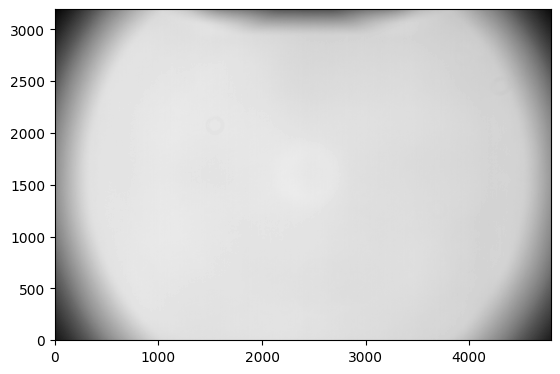

In [7]:
masterflat=flat('R')
plt.imshow(masterflat, cmap='gray', origin='lower')

In [8]:
pathd=os.getcwd()+'/DARK300'
fitsfiled=fits.open(pathd+'/'+'2025-09-25_17-59-33_DARK_300.00s_0000.fits')

datad = fitsfiled[0].data

In [9]:
def dark(time):
    path=os.getcwd()+'/DARK'+time
    Num_of_files=len(os.listdir(path))
    Grid=np.zeros((datad.shape[0],datad.shape[1],Num_of_files))
    j=0
    for file in os.listdir(path):
        fitsfile=fits.open(path+'/'+file)
        dati = fitsfile[0].data
        Grid[:,:,j]=dati
        j+=1
    master=np.median(Grid, axis=2)-masterbias
    return master

In [10]:
mastercurrent=dark('600')

In [11]:
fitsfiled=fits.open('2025-10-10_18-16-27_sci_M103_R_300.00s_0000.fits')
data = fitsfiled[0].data
wcs = WCS(fitsfiled[0].header)


Set MJD-AVG to 60958.763168 from DATE-AVG'. [astropy.wcs.wcs]


In [12]:
science= (data-masterbias-mastercurrent)/masterflat
mean=np.mean(science)
std=np.std(science)

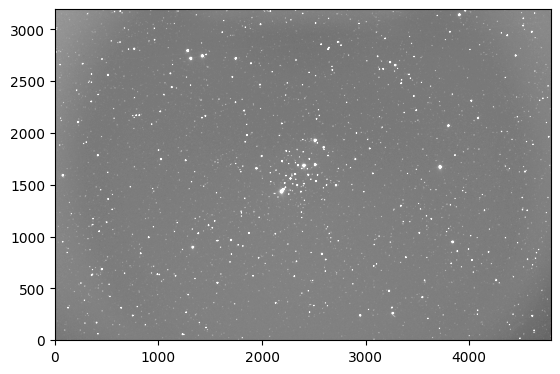

In [13]:
plt.imshow(science, vmin=mean-2*std, vmax=mean+2*std,cmap='gray',origin='lower')
pixpos = wcs.wcs_world2pix(  40.6708, 54.3489, 1)  # RA, DEC in degrees

In [14]:
print(pixpos)

[array(21842.27292248), array(72781.75851408)]


In [22]:
GAIAspectrum = fits.open('GAIA3_509861962931731968.fits')

In [16]:
r_trasm = Table.read('r_trasmission.txt', format='ascii.basic')
r_wave=r_trasm["Wavelength(A)"]
r_value=r_trasm["Transmission(QE*Filter)"]

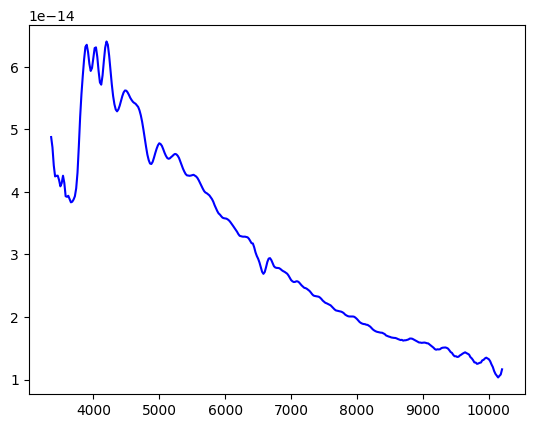

In [ ]:
plt.plot(GAIAspectrum[1].data, GAIAspectrum[0].data, color='blue')

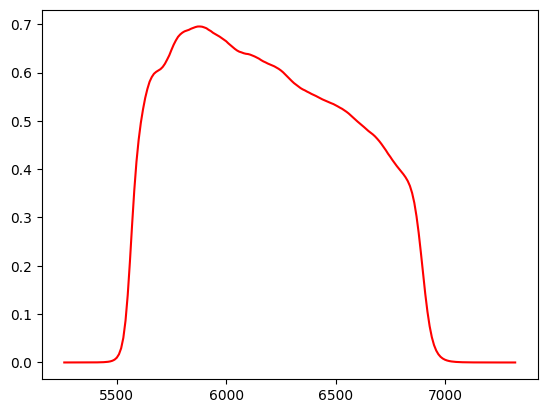

In [18]:
plt.plot(r_wave, r_value,color='red')

New y of the filter 

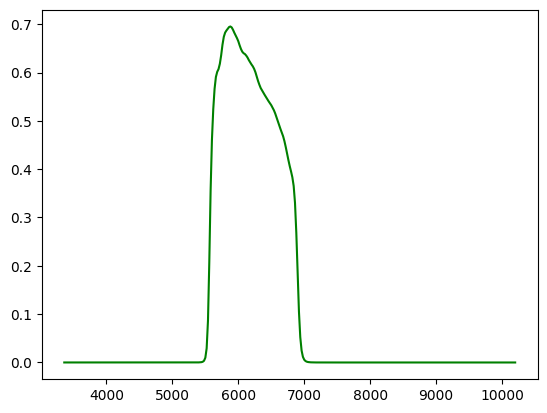

In [19]:
r_trasm_new=np.interp(GAIAspectrum[1].data, r_wave, r_value)
plt.plot(GAIAspectrum[1].data, r_trasm_new,color='green')

In [20]:
x=GAIAspectrum[1].data
y_filter=r_trasm_new
y_spectrum=np.array(GAIAspectrum[0].data)


In [21]:
Num = np.trapz(y_spectrum * y_filter, x)
Den= np.trapz(y_filter, x)
F=Num/Den           # Factor for the flux
